In [1]:
import numpy as np
import pandas as pd
import math
from statsmodels.graphics.dotplots import dot_plot
from collections import OrderedDict, Counter
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Lecture 2

## Describing Data

There are several ways to summarize and describe data; we will examine five general methods:

1. Using __graphs__ to describe data
2. Examining where the __middle__ of a data set is located
3. Examining how a data set is __spread__ out
4. Using information about the __spread__ of the data, in conjunction with the __middle__ of the data, to make other __summary statements__ about data
5. Describing how specific data values __differ in relation to__ the rest of the data collected

### Graphs

A graph of a data set usually provides the simplest and most efficient method of understanding how the data are behaving. 

How a data set behaves will dictate how we analyze the data in the future.  We will look at several __graphical displays__ to examine the behavior of data sets, e.g., bar charts, dot plots, histograms, and stem + leaf display.

#### Bar Charts

A way of summarizing a set of __qualitative__ data.  They are often used to summarize data and to show the major features of the distribution of the data in a convenient form.  In a bar chart each category is assigned a bar of similar width in the graph.  The height of each bar represents the number of data points in the category it represents.  Bar charts can be displayed hrizontally or vertically and are usually drawn with  spacing between the bars.

__Example__: A survey of 1000 Bay Area internet users was taken and each person's top internet related complain was recorded.  The results of the survey are summarized in the following __bar chart__.

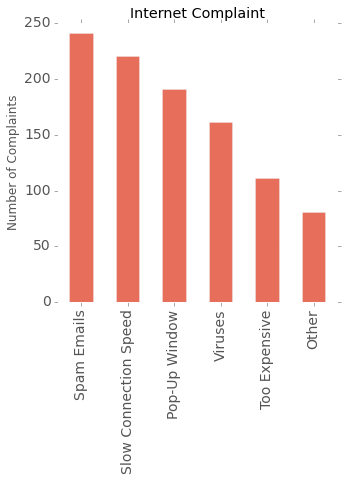

In [2]:
data = []

for i in range(221):
    data.append("Slow Connection Speed")

for i in range(191):
    data.append("Pop-Up Window")
    
for i in range(241):
    data.append("Spam Emails")
    
for i in range(161):
    data.append("Viruses")

for i in range(111):
    data.append("Too Expensive")
    
for i in range(81):
    data.append("Other")
    
df = pd.Series(data).value_counts()
ax = df.plot(kind='bar', figsize=(5, 5), title="Internet Complaint", fontsize=14, alpha=0.8);
ax.set_ylabel('Number of Complaints');

__Questions__:
+ What was the biggest complaint?
    The category containing the most data has the tallest bar, so we know that 'Spam Emails' is the biggest complaint.
+ How many survey respondents said that the pop-up windows were a problem?
    Since 19% of the respondents said pop-up windows were a problem, we only need to multiply the sample size by 0.19 to get the answer.  See the 'sample' function below.
+ What proportion of survey respondents said that viruses or a slow connection speed was a problem? (a __proportion__ is a percent in decimal form).
    The proportion of survey respondents that said viruses or a slow connection speed was 0.38, because .22 reported a slow connection and .16 said viruses; .22 + .16 = .38 

In [3]:
def sample(percent, total):
    sum = total * percent
    return sum

In [4]:
sample(0.19, 1000)

190.0

#### Dot Plot Graph

A nationwide corporation that hires hundres of college graduates each year is trying to obtain information about starting alaries for new grads.  The corporation has collected data, measure in thousands of dollars, for twenty recent hires.  The starting salaries, rounded to the nearest thousand, are:

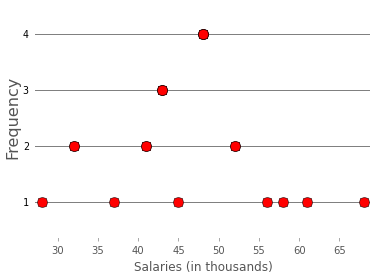

In [5]:
# create a list of values
salaries = [43, 48, 37, 52, 45, 43, 32, 28, 68, 56, 52, 32, 61, 48, 43, 48, 48, 41, 58, 41]

# create a DataFrame and name the first column 'salaries'
df = pd.DataFrame(salaries, columns=['salaries'])

# create a column called 'freq' to represent the count of each value in column 'salaries'
df['freq'] = df.groupby('salaries')['salaries'].transform('count')

# plot with statsmodels dot_plot
fig = dot_plot(points=df['salaries'], lines=df['freq'], line_order=[4, 3, 2, 1])
plt.ylabel("Frequency", size=16);
plt.xlabel("Salaries (in thousands)");

#### Histogram

In order to create a __histogram__, you must first break up the horizontal axis into intervals of equal length (called __classes__) such that each observation falls into one, and only one, class.

Lets look at our salaries:

In [6]:
df.salaries.describe()

count    20.00000
mean     46.20000
std      10.03992
min      28.00000
25%      41.00000
50%      46.50000
75%      52.00000
max      68.00000
Name: salaries, dtype: float64

Notice the smallest obersvation is 28 and our largest is 68.  So, if we start our first class at 20 and end the last class at 70, we are insured of including all data points.  We can then determine each class by starting at 20 and letting the width of each class be 10.

In order to construct the histogram, the idea is to draw bars above each class where the heights of the bars represent the number of data points that fall in each class.

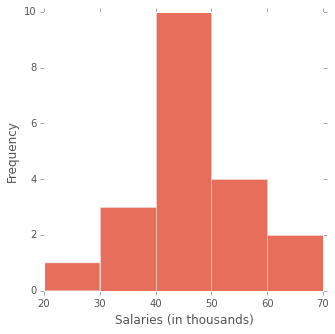

In [7]:
ax = df['salaries'].plot(kind='hist', figsize=(5, 5), bins=[20, 30, 40, 50, 60, 70], alpha=0.8);
ax.set_ylabel('Frequency');
ax.set_xlabel('Salaries (in thousands)');

#### Stem and Leaf Graph

In order to create a __Stem and Leaf Graph__, you must first break up the data into stems and eaves.  In the salaries data set, the ten's digits become the stems and the unit's digits become the leaves, e.g., if you have 22, 25, 28, you will separate them like, '2 | 2 5 8', where the stem goes on the left of the vertical line, and the leaves go on the right of the vertical line.  Let's use our salaries data to create a graph:

In [8]:
def stemleaf(list):
    d = OrderedDict((((str(v)[:-1],' ')[v<10], Counter()) for v in sorted(list)))
    for s in ((str(v),' '+str(v))[v<10] for v in list) : d[s[:-1]][s[-1]]+=1
    m=max(len(s) for s in d)
    for k in d:
        print('%s%s | %s'%(' '*(m-len(k)),k,' '.join(sorted(d[k].elements()))))

In [9]:
stemleaf(salaries)

2 | 8
3 | 2 2 7
4 | 1 1 3 3 3 5 8 8 8 8
5 | 2 2 6 8
6 | 1 8


The above is a completed __Stem and Leaf__ graph.  The stems go on the left of the vertical line, and the leaves go on the right of the vertical line.  This graph shows how the data is distrubuted from the 20's to the 60's.

It is most important that you can look at a Stem and Leaf graph and see the original data values.

To obtain a __cumulative count__ determine the number of data values in each row and add them up as you increase from low to high values in the graph.  The above graph has 20 data values.

### How to describe the behavior of data

There are certain behaviors of data that are so common in every day life, that such behaviors are given special descriptions.  It is important to be familiar with these descriptive phrases so that we have a common way to describe these behaviors.

__Distribution__: When we refer to a __distribution__ of a population we are referring to the _behavior_ of the _entire population_.

Distributions can be __symetrical__, __bimodal__, __skewed to the right__, or __skewed to the left__.  Each of these distributions tell us something about the data's behavior.  _Note that we whe say 'skewed' we are not talking about the area of the distribution with the most data values, but the area with the least data values.

### Measures of Central Tendency

Beyond summarizing data graphically, we can compute __descriptive measures__ which are numbers that 'describe' a set of quantitative data.  We will focus on two types of numbers that will help us to construct a mental image of the distribution of a collection of data:

1. __Measures of Cental Tendency__
2. __Measures of Dispersion__(Spread of the data)

__Measures of central tendency are numbers that tell us where the "center" of a distribution of data is located.  The following table is a summary of the three measures of central tendency that we will be studying in this section.

#### Mean
$$
\overline{x} = \frac{\sum x}{n}
$$

The __mean__ is the sum of the data measurments divided by the number of measurements contained in the data set.  (_average_ may be a more familiar term, but it means the same thing).  It is important to note that the mean is sensitive to the max and min of a data set, so, it is not always the a good measure for the center of a data set.

#### Median
$$
\overrightarrow{15}, \overrightarrow{24}, \underline{37}, \overleftarrow{56}, \overleftarrow{65}
$$

The __median__ is the number that divides the data set into two equal sized groups: those greater than the median and those les than the median.

__WARNING__: The data set must be in sequential order before you calculate the median!

For a data set with _n_ obserbations:
* if _n_ is an odd number: __median__ = the middle obervation
* if _n_ is an even number: __median__ = mean of the middle two observations
    
#### Mode

The numerical value in a data set that occurs most frequently

Let's use an example of infant mortality data

In [10]:
infantMortality = {'Somolia': 80, 'North Korea': 20, 'Sweden': 5, 'US': 10, 'China': 34, 'Mexico': 33, 'France': 6}
df = pd.DataFrame.from_dict(infantMortality, orient='index')
df.columns = ['Infant Mortality Rate']
df

,Infant Mortality Rate
China,34
Mexico,33
US,10
France,6
Sweden,5
North Korea,20
Somolia,80


In [11]:
df.describe()

,Infant Mortality Rate
count,7.000000
mean,26.857143
std,26.321275
min,5.000000
25%,8.000000
50%,20.000000
75%,33.500000
max,80.000000


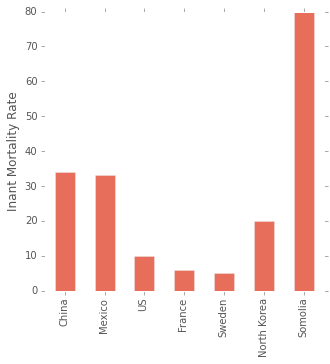

In [12]:
ax = df['Infant Mortality Rate'].plot(kind='bar', figsize=(5, 5), alpha=0.8);
ax.set_ylabel('Inant Mortality Rate');

$$
\overline{x} = sample\;mean\\
\mu = population\;mean
$$

An __outlier__ is a number in a data set that is very large or very small in relation to the rest of the numbers in the collection of data.  A data set can have more than one outlier, or no outliers.

__outliers__ affect sample mean, because outliers tend to pull the mean away from the center of a data set.

In [13]:
sellingPrice = [9.3, 11.0, 28.7, 7.6, 6.5, 8.7, 7.4, 7.8, 6.7, 9.5]
df = pd.Series(sellingPrice)
df.median()

8.25

In [14]:
df.mean()

10.32

In [15]:
df.mode()

Series([], dtype: float64)

### Measure of Data Variability

#### Why do we need to measure the spread of data?

We have already studied some measures of central tendency (mean, median, and mode); however, measures of central tendency are not enough by themselves to adequately describe the behavior of a data set.  Measures of central tendency give no information about the amount of variation or spread of a data set.  Note: the words __dispersion__, __spread__, and __variation__ have the same meaning for us.

_Example_: Suppose that we have three different sets of sample data, where each sample consists of 6 ages in years or faculty members.  Let us examine the behavior of three data sets.

In [16]:
a = [40, 30, 70, 20, 50, 60]
b= [40, 42, 70 ,20, 50, 48]
c = [40, 48, 44, 42, 50, 46]

A = pd.Series(a)
B = pd.Series(b)
C = pd.Series(c)

A.median()

45.0

In [17]:
B.median()

45.0

In [18]:
C.median()

45.0

As we can see, each of these three data sets has the same median; however, they do not behave in exactely the same way.

The __range__ is the simplest measure of spread to calculate--it is simply the difference between teh largest and the smallest values in a data set.

$$
Range = (largest\;value) - (smallest\;vaue)
$$

In [19]:
def range(data):
    range = data.max() - data.min()
    return range

In [20]:
range(A)

50

In [21]:
range(B)

50

In [22]:
range(C)

10

Data set C has the smallest range because the data values are closest together.  Strangely, data sets A and B have the same range even though they are spread out differently!  Data set A is much more spread out than data set B, but that information is lost when using the range as a measure of spread.  The range only takes into account the first and last data values.  The information in all other values is ignored.

Enter __Standard deviation__.

The __sample standard deviation__ takes all data values into account when meassuring spread.

$$
s = sample\;standard\;deviation
$$

In general, the smaller value of the standard deviation for a data set indicates that the values of that data set are spreak over a relatively smaller region around the mean.

In contrast, a larger value of the standard deviation for a data set indicates that the values of that data set are spread out over a relatively larger region around the mean.

In [23]:
A.std()

18.708286933869708

In [24]:
B.std()

16.235762994081924

In [25]:
C.std()

3.7416573867739413

__Standard Deviation Formula__
$$
s = \sqrt{\frac{\sum (x - \overline{x})^{2}}{n - 1}}
$$

Just by looking at this formula, you can probably guess that it is not easy to compute the standard deviation of a set of numbers.  However, it is very important that you understand why the formula will give us a larger value of _s_ when we have a date set with less spread.

__Sample variance Formula__
$$
s^{2} = \frac{\sum(x-x)^{2}}{n-1}
$$

Let's say data set A represents faculty members' age

In [26]:
A

0    40
1    30
2    70
3    20
4    50
5    60
dtype: int64

In [27]:
A.median()

45.0

$$\overline{x} = 45$$

So we have our values--where do we start with the formula?  Well, we start by finding the median so we can begin by subtracting the values of our data set by the median, which is this step of the formula:

$$(x -\overline{x})$$

Then we work on squaring the values

$$(x -\overline{x})^{2}$$

In [28]:
# let's implement these steps in python
def sVariance(data):
    s = []
    sum = 0
    for i in data:
        s.append((i - data.mean())**2)
    for i in s:
        sum = sum + i
    return sum

sVariance(A)

1750.0

Next we need to take the number and divide it by:

$$n-1$$

In [29]:
# let's implement n-1 into our function
def sVariance(data):
    s = []
    sum = 0
    for i in data:
        s.append((i - data.mean())**2)
    for i in s:
        sum = sum + i
    sum = sum / (len(s) -1)
    return sum

sVariance(A)

350.0

$$s^{2} = 350$$

For the __sample standard deviation__ and the __sample variance__ these steps so far are similar, except that in order to find the __sample standard deviation__ we have to take the squar root of the __sample variance__

$$Sample\;Standard\;Deviation = \sqrt{Sample\;Variance}$$

In [30]:
def sDeviation(data):
    s = []
    sum = 0
    for i in data:
        s.append((i - data.mean())**2)
    for i in s:
        sum = sum + i
    sum = sum / (len(s) -1)
    return math.sqrt(sum)

sDeviation(A)

18.708286933869708

In [31]:
A.std()

18.708286933869708

Like before, the notation differs between sample and population; therefore, observe the following rule:

$$\sigma = Standard\;derivation\;of\;entire\;population \\
s = Sample\;standard\;derivation$$

### Chebyshev's Rule

We will introduce a new variable, __k__, which stands for the number of standard deviations we travel to either side of the mean.

In general, there are only three intervals that we can reference when using Chebyshev's Rule:
$$1. \;\;\;\overline{x}-ks \\
2. \;\;\; \overline{x}\pm ks \\
3. \;\;\; \overline{x}+ks$$

1. The interval that contains all values to the left of the mean
2. The interval that contains all x values
3. The interval that contains all values to the right of the mean

According to Chebyshev, the _maximum_ proportion of data is:
$$\frac{1}{k^{2}}$$

According to Chebyshev, the _minimum_ proportion of data is:
$$1-\frac{1}{k^{2}}$$

At this point, we should use Chebyshev's Rule to solve any problem that deals with two things:
1. An interval of numbers.
2. A reference to the amount of data in that interval.

_Example_: A study was performed to examine the amount of money college students had in their bank accounts at the beginning of the academic year.  A random sample of students was taken and each students' account balence was recorded.  The mean account balance of the students sampled was 250 and the standard deviation was 50.  How many students in the sample had a bank account balance between 125 and 375?

In [32]:
def find_k(std, mean, point):
    if mean > point:
        interval = mean - point
    else:
        interval = point - mean
    k = (interval / std)
    return k

In [33]:
find_k(50, 250, 375)

2.5

In [34]:
find_k(50, 250, 125)

2.5

In [35]:
def chebyMin(k):
    sum = 1 - (1 / (k**2))
    return sum

In [36]:
chebyMin(2.5)

0.84

_modified example_: A study was performed to exmine the amout [...] The mean acount balance of the students' sample was 250 and the standard deviation was 50.  Construct an interval centered about the mean that contains at least 80% of the bank account balances.

We can use Chebyshev's rule for setting the interval's left and right sides using the mean and standard deviation. Remember:

$$\overline{x} - ks\;\;\; (left side) \\
\overline{x} + ks\;\;\; (right side)$$

In [37]:
def cheby_k_percent(proportion):
    sum = math.sqrt((1 / ((proportion - 1) * -1)))
    return sum

In [38]:
cheby_k_percent(.80)

2.23606797749979

In [39]:
chebyMin(2.24)

0.8007015306122449

In [40]:
def chebysRule(mean, k, std):
    sum1 = mean - (k * std)
    sum2 = mean + (k * std)
    return sum1, sum2

In [41]:
chebysRule(250, 2.24, 50)

(138.0, 362.0)

_Modified Example_: A study was performed to examine the amount of money college [...] THe mean account balance of the students sampled was 250, the standard deviation was 50.  What can you conclude about the percentage of student that had more than 400 in their bank accounts?

We need to find out what data is behond 400, so, we use Chebyshev's Maximum rule, remember:

$$\frac{1}{k^{2}}$$

In [42]:
def cheby_k_upperBound(mean, std, upperBound):
    sum = (upperBound - mean) / std
    return sum

In [43]:
cheby_k_upperBound(250, 50, 400)

3.0

In [44]:
def chebyMax(k):
    sum = 1 / (k**2)
    return sum

In [45]:
chebyMax(3)

0.1111111111111111

### The Empirical Rule

Like Chebyshv's Rule, the __Empirical Rule__ will involve two general items:

1. A reference to an interval of numbers.
2. A discussion regarding the amount of data in that interval.

However, unlike Chebyshev's Rule, you will NOT be give an Empirical Rule formula allowing you to determine how much data is contained in specified intervals centered around the mean.

Recall that Chebyshev's Rule can be applied to ANY data set.  This will NOT be the case with the Empirical Rule!

__Empirical Rule Restrictions__:
1. For now, you will only be allowed to apply the Empirical Rule to k values of 1, 2, or 3 only.
2. The Empirical Rule can ONLY be applied to data sets that are __symetric__ and __mound-shaped__!

The good news is that the Empirical Rule is a much more precise rule than Chebyshev's.  The bad news is that you MUST have a mound-shaped and symmetric data set in order to apply the Empirical Rule.  In addition, if k is anything other than 1, 2, or 3, you will NOT be able to use the Empirical Rule.

#### The rule:

1. Approximately __68%__ of the measurments will fall within __1 standard deviations__ away from the mean.
2. Approximately __95%__ of the measurments will fall within __2 standard deviations__ away from the mean.
3. Approximately __99.7%__ of the measurements will fall within __3 standard deviations__ away from the mean.

This corrosponds to the following formulae:

$$\overline{x}\pm 1s \\
\overline{x}\pm 2s \\
\overline{x}\pm 3s$$

### Knowledge Test

Newspapers in large cities typically publish data on the selling prices of homes in the area they represent.  A random sample of recently sold single-family homes (with at least three bedrooms) was taken in the counties of Santa Clara and San Mateo in the San Francisco Bay Area--a location where home prices are consistently high--and the sale prices were recorded.  The mean of the sample was 1,250,000 and the sample standard deviation was 200,000.  It is known that the distribution of sales prices of homes in the Bay Area are not mound-shaped and symmetric.

+ _What would be more appropriate to use with this problem, Chebyshev's Rule or the Empirical Rule?  Why?_

Chebyshev's Rule; the distribution is not mound-shaped and symmetric.

+ _How many homes sold for more than 1,742,000?_

In [46]:
cheby_k_upperBound(1250000, 200000, 1742000)

2.46

In [47]:
chebyMax(2.46)

0.16524555489457335

+ _What proportion of homes sold for some amount between 1,250,000 and 1,650,000?_

This is a trick question--remember--there are only three intervals wto which we can apply Chebyshev's Rule:
* An interval that is centered around the mean
* An interval for which the lower bound is above the mean that has no upper bound
* An interval for which the upper bound is below the mean that has no lower bound

The interval inquestion here has the mean as the lower bound.  Chebyshev's rule cannot help us with that.

+ _What can you say about the percent of homes that sold for between 758,000 and 1,742,000?

In [48]:
find_k(200000, 1250000, 758000)

2.46

In [49]:
chebyMin(2.46)

0.8347544451054266

_Example 2_: The National Organization for Educational Research keeps track of GPAs of College students across the nation.  In order to maintain accurate records, several samples are taken yearly by the organization.  One such sample of GPAs was recently taken from students across the country and the mean and standard deviation were determined to be 2.55 and 0.45 respectively.  It is known that the data set collected was mound-shaped and symmetric.

+ _What would be more appropriate to use with this problem, Chebyshev's Rule or the Empirical Rule? Why?_

The Empirical Rule because the distribution is mound-shaped and symmetric.

+ _Construct an interval that contains approximately 95% of the GPAs_

Since 95% of the measurements fall between two standard deviations away from the mean:

In [50]:
def empiricalRule(mean, std, num_std):
    sum1 = mean - (num_std * std)
    sum2 = mean+ (num_std * std)
    return sum1, sum2

In [51]:
empiricalRule(2.55, 0.45, 2)

(1.65, 3.4499999999999997)

In [52]:
find_k(0.45, 2.55, 3.00)

1.0000000000000004

The empirical rule says that one standard deviation away from the mean equals 68%!

+ _Students in the 84th percentile are eligible to apply for a National Scholarship.  Based on the sample taken, what is the minimum GPA required to qualify for the scholarship?_

Since we know already that k=1 and that the 68% is contained within the upper and lower bounds, we can deduce that both outer edges are 16% each.  Since 68 + 16 = 84, then everythin from the outer bound and beyond is what we are looking for; at least, in this instance, we're looking for the outer bound.

In [53]:
empiricalRule(2.55, 0.45, 1)

(2.0999999999999996, 3.0)

Every student with a GPA of 3.00 or higher will qualify for the scholarship.

_Example 3_: Given a data set with a max value of 525 and a minimum value of 315, what would you estimate the standard deviation to be?

Typicall, whether we use either Chebyshev's Rule or the EMpirical Rule, most, if not all, of our data will fall within 3 standard deviations away from the mean.  Thus, the range of the data would be roughly the same as the distance corresponding to the interval within 3 standard deviations away from the mean.  That is, the range will roughly be the same as 6 standard deviations.  If the range roughly equals _6s_ then we would expect _s_ to roughly equal _range/6_

In [54]:
525 - 315 # gives me the range

210

In [55]:
210 / 6 #estimate for the standard deviation

35.0

### Measures of Relative Standing

Measures of relative standing are simply numbers that help us to describe how a particular measurement compares to the rest of the values in a data set.

For example, if your instructor grades on a curve, then your actual score on a test may not be as important as the number of students who had a score worse than your score.  Suppose that you took a statistics examp with 30 other students and recieved a score of 55 out of 100.  At first this might seem fairly depressing, but if 25 of those students had a score lower than you, then your __relative standing__ in the class is quite high.  After all, only 4 students scored higher than you!  That is, relative to the rest of the data values you are in the top of the class.

In this section we will look at two main measures of relative standing.  __Percentiles and z-scores__.  Below is an overview.
#### Percentiles

+ Gives the percentage of data points below a particular value
+ Describes your position in relation to all other data points
+ Always reported as a percentage

__Percentile__: Corresponds to the percentage of data points BELOW the particular obersvation in question.

Suppose that we collect data from 50 adult Americans on their percetn of body fat.  Then we would let X = percent body fat.  Assume that we pick one X-value from the 50 adult Americans who have a body fat percentage that is lower than the data value of 23%.  Suppose that it turns out that 40 of the data values are less than 23% and the rest are higher.

In order to compute the percentage of the 50 data values that are lower than the selected value of 23% body fat, we simply take 40 and divide it by 50, that is _40/50 = 0.80_.  We have a special way of reporting the percentage of data below a particular data value.  In this case we would say __"if you have body fat percentage of 23%, then you are in the 80 percentile."__  That is, 80% of the sample of 50 body fat percentages are lower than the particular data value of 23%.

#### z-score

$$ z = \frac{x - \overline{x}}{s}$$

+ Makes use of the mean and standard deviation of a data set
+ Distance from the mean is expressed as the number of standard deviations from the mean
+ z is unitless

__z-score__: The number of standard deviations that a particular observation deviates from the mean.

Why do people use z-scores?  Suppose that you recently took an exam in one of your courses, and you were told that the z-score for your exam is _z = 3.25_.  But you were not told the actual score on your exam.  Would that give you an idea of how well you had done on the exam?

Yes, it should--from your knowledge of the Empirical Rule and Cheybshe's Rule, you know that nearly all the data in a distribution lies within 3 standard deviations of the mean.  Since the z-score of your exam is more than 3 standard devations above the mean, then you know that the actual score on your exam is higher than most, if not all, of the other exam scores.

__How to find the z-score__: Use this simple formula:

$$z = \frac{x - \mu}{\sigma} \;\;\; (for\;a\;population) \\
z = \frac{x - \overline{x}}{\sigma} \;\;\; (for\;a\;sample)$$

So, if there is an exam with a mean of 75 and a standard derivation of 5, and you score 85, how do we your associated z-score?

In [56]:
def zscore(mean, std, x):
    sum = (x - mean) / std
    return sum

In [57]:
zscore(75, 5, 85)

2.0

_Example_: The unemployment rates of the 15 largest US metropolitan areas for the 04-05 fiscal year are given below.  Each data value represents the average unemployment rage seasonally adjusted for the fiscal year and is rounded to the nearest one-tenth of a percent.  Assume that the data is a sample from all major US metropolitan areas.

In [58]:
unemployment = [5.2, 4.6, 5.7, 4.9, 3.7, 6.4, 7.1, 4.6, 5.0, 4.2, 3.9, 5.7, 4.3, 5.4, 4.6]
rates = pd.Series(unemployment)
rates.describe()

count    15.000000
mean      5.020000
std       0.928286
min       3.700000
25%       4.450000
50%       4.900000
75%       5.550000
max       7.100000
dtype: float64

In [59]:
zscore(5.02, .9283, 4.2)

-0.8833351287299358

### Outliers

__Outliers__ are typically attributable to one of the following causes:

1. The measurement is observed, recorded or entered into the computer incorrectly.
2. The measurement comes from a different population.
3. The measurement is correct, but represents a rare (cahnce) event.

The only situation that we will consider in this course is item 3, when the measurement is correct, but it is a rare event.

#### Rules for detecting outliers

Any observation that is more than 3 standard deviations away from the mean is considered an outlier.

That is, any x-value whose associated z-score is < 3 or > 3, is called an outlier.

### Test your Knowledge

In recent years, many of the states in the US has experienced budgetary problems, with many states having serious shortfalls in their budgest.  These problems cause many of the groups that are state funded to suffer, including education, police and fire protection, and state employees to name a few.  The data in the following table is a random sample of state budgets during the 04-05 fiscal year.  All data is rounded to the nearest billion dollars.  The largest budget of 81.7 billion dollars is from the most populous State of California.

Here's our data set:

In [60]:
stateBudgets = [12.7, 23.2, 14.1, 13.2, 56.6, 25.1, 81.7, 7.7, 49.4, 22.5]

The sample mean is 30.62 billion dollars and the sample standard deviation is 24.06 billion.

+ _If Arizona is the state with the budget of 7.7 billion dollars, then find and interpret the associated z-score_

In [61]:
budgets = pd.Series(stateBudgets)
budgets.describe() # check the accuracy of the mean and std

count    10.00000
mean     30.62000
std      24.06264
min       7.70000
25%      13.42500
50%      22.85000
75%      43.32500
max      81.70000
dtype: float64

In [62]:
zscore(30.62, 24.06, 7.7)

-0.9526184538653368

+ _The state of Texas has the state budget that corresponds to 56.6 billion dollars.  Which of the two states, Arizona or Texas has a state budget which is farther from the mean?_

In [63]:
zscore(30.62, 24.06, 56.6)

1.0798004987531173

Texas has a higher z-score.

+ _The state of California has the largest budget of 81.7 billion dollars.  Is the state budget of California an outlier?_

In [64]:
zscore(30.62, 24.06, 81.7)

2.123025768911056

No, it is not an outlier since it is not more than 3 standard deviations from the mean.

+ _If a particular state has a z-score of -0.31, then waht is the state budget for that state?_

In [65]:
def zscoreNoX(mean, std, z):
    sum = ((z)*(std)) + mean
    return sum

In [66]:
zscoreNoX(30.62, 24.06, -0.31)

23.1614

## Lab 1

Create a table that holds two data sets containing the average retail price of gasoline for California and Texas for each month in 2005.

In [67]:
d = {'California':[2.02, 2.16, 2.35, 2.6, 2.52, 2.41, 2.56, 2.72, 3.03, 2.93, 2.57, 2.32],
         'Texas': [1.77, 1.84, 2.01, 2.17, 2.09, 2.11, 2.23, 2.45, 2.84, 2.72, 2.21, 2.16]}
idx = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data = pd.DataFrame(d, index=idx)

In [68]:
data

,California,Texas
Jan,2.02,1.77
Feb,2.16,1.84
Mar,2.35,2.01
Apr,2.60,2.17
May,2.52,2.09
Jun,2.41,2.11
Jul,2.56,2.23
Aug,2.72,2.45
Sep,3.03,2.84
Oct,2.93,2.72


In [69]:
data.describe()

,California,Texas
count,12.000000,12.000000
mean,2.515833,2.216667
std,0.292185,0.318158
min,2.020000,1.770000
25%,2.342500,2.070000
50%,2.540000,2.165000
75%,2.630000,2.285000
max,3.030000,2.840000


In [70]:
data1 = data.copy()
data1['CAplus3'] = data1['California'].map(float) + 3.0

In [71]:
data1

,California,Texas,CAplus3
Jan,2.02,1.77,5.02
Feb,2.16,1.84,5.16
Mar,2.35,2.01,5.35
Apr,2.60,2.17,5.60
May,2.52,2.09,5.52
Jun,2.41,2.11,5.41
Jul,2.56,2.23,5.56
Aug,2.72,2.45,5.72
Sep,3.03,2.84,6.03
Oct,2.93,2.72,5.93


In [72]:
data1.describe()

,California,Texas,CAplus3
count,12.000000,12.000000,12.000000
mean,2.515833,2.216667,5.515833
std,0.292185,0.318158,0.292185
min,2.020000,1.770000,5.020000
25%,2.342500,2.070000,5.342500
50%,2.540000,2.165000,5.540000
75%,2.630000,2.285000,5.630000
max,3.030000,2.840000,6.030000


In [73]:
data['California'].median()

2.54

In [74]:
data1['CAplus3'].median()

5.54

In [75]:
range(data.California)

1.0099999999999998

In [76]:
range(data1.CAplus3)

1.0099999999999998

In [77]:
range(data.Texas)

1.0699999999999998

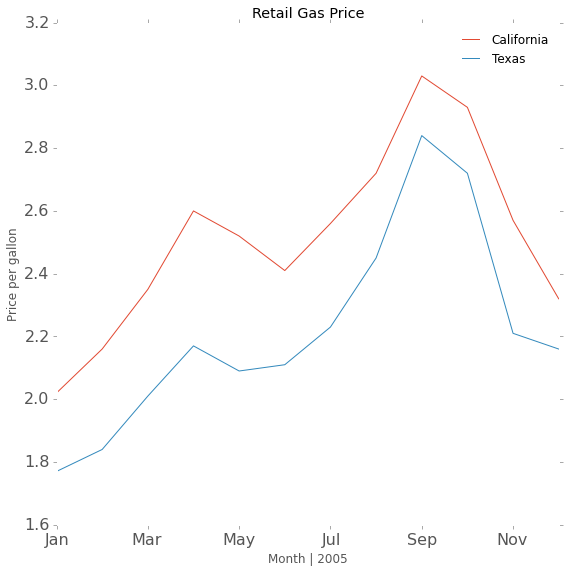

In [78]:
ax = data.plot(kind='line', figsize=(9, 9), title='Retail Gas Price', fontsize=16);
ax.set_ylabel('Price per gallon');
ax.set_xlabel('Month | 2005');